<a href="https://colab.research.google.com/github/Nsv61/Netologia_diploma_NSV61/blob/main/Netologia_diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# п. 1 Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

In [ ]:
# п. 2 Рассчитайте основные статистики для переменных
# (среднее,медиана,мода,мин/макс,сред.отклонение).
print('п.2 Основные статистики для переменных', sep='/n')
df_stat = df
print(df_stat.describe(include='all'))

print('min', min(df['satisfaction_level']))
print('max', max(df['satisfaction_level']))
print('Размах', max(df['satisfaction_level']) - min(df['satisfaction_level']))
print('Медиана', df['satisfaction_level'].median())
print('Среднее', df['satisfaction_level'].mean())
print('Мода', df['satisfaction_level'].mode()[0])
print('std', (df['satisfaction_level']).std())

п.3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


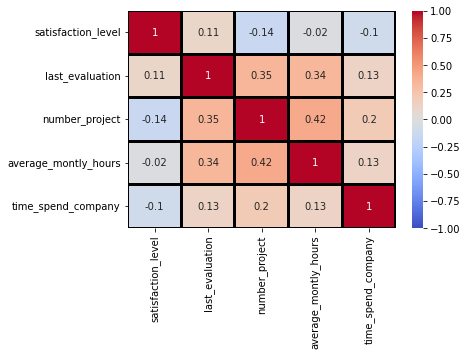

In [22]:
# п. 3 Рассчитайте и визуализировать корреляционную матрицу для
# количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.
print('п.3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.', sep='/n')
df_stat = df_stat.drop(['salary', 'department','left','Work_accident','promotion_last_5years'], axis = 1)
print(df_stat.corr())
sns.heatmap(df_stat.corr(), annot=True, vmin=-1, center=0, vmax=1, cmap='coolwarm', linewidths=2, linecolor='black')
plt.show()
#из корреляционной матрицы видно, что наиболее скореллированные переменные -это 
#average_montly_hours и number_project, last_evaluation и number_project
#а наимение - number_project and satisfaction_level, time_spend_company и satisfaction_level

In [23]:
# п. 4 Рассчитайте сколько сотрудников работает в каждом департаменте.
print('п. 4 Рассчитайте сколько сотрудников работает в каждом департаменте.', sep='/n')
print(df['department'].value_counts()) # кол-во людей в каждом отделе

п. 4 Рассчитайте сколько сотрудников работает в каждом департаменте.
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [ ]:
# п. 5 Показать распределение сотрудников по зарплатам.
print('п. 5 Показать распределение сотрудников по зарплатам.', sep='/n')
df_gr = df['salary'].value_counts()
print(df['salary'].value_counts())  # распределение по зарплатам
df_gr.plot(kind='barh', label='Статистика магнитуды по годам')
plt.show()

In [ ]:
# п. 6 Показать распределение сотрудников по зарплатам в каждом
# департаменте по отдельности
print('п. 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности', sep='/n')
df_gr = df.groupby(['department'])['salary'].value_counts()
print(df.groupby(['department'])['salary'].value_counts())
df_gr.plot(kind='barh', label='Статистика магнитуды по годам')
plt.show()

# п. 7 пропускаем

In [ ]:
# п. 8 
print('п. 8 Доля сотрудников с повышением за последние 5 лет', sep='/n')
print(df.groupby(['left'])['promotion_last_5years'].value_counts())

print('Средняя степень удовлетворенности')
print(df.groupby(['left'])['satisfaction_level'].mean())
# посчитаем то же самое другим способом:
sat_0 = round(df[df['left'] == 0]['satisfaction_level'].mean(), 2)
sat_1 = round(df[df['left'] == 1]['satisfaction_level'].mean(), 2)
print(F"Средняя степень удовлетворенности работающих - {sat_0} ,уволившихся {sat_1}")

print('Среднее кол-во проектов')
print(df.groupby(['left'])['number_project'].mean())
prj_0 = round(df[df['left'] == 0]['number_project'].mean(),2)
prj_1 = round(df[df['left'] == 1]['number_project'].mean(),2)
print(F"Среднее кол-во проектов работающих {prj_0} ,уволившихся {prj_1}")

In [41]:
# п. 9
print('п. 9', sep='/n')

df = df.drop(['salary', 'department'], axis = 1)

class_ = df['left'].to_numpy()
# отделяем обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(df, class_, test_size=0.25)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)   # обучение модели
lda.predict(x_test)         # прогноз на тестовой выборке
result = pd.DataFrame([y_test, lda.predict(x_test)]).T  # разница теста и расчета
print('разница теста и расчета')
print(result)

from sklearn.metrics import accuracy_score
print('Точность прогноза', accuracy_score(y_test, lda.predict(x_test)))  # точность верных прогнозов
print("Коэфф", lda.coef_)   # коэф дискриминантных линий


п. 9
разница теста и расчета
      0  1
0     0  0
1     0  0
2     0  0
3     1  0
4     1  1
...  .. ..
3745  0  0
3746  0  0
3747  0  0
3748  1  1
3749  0  0

[3750 rows x 2 columns]
Точность прогноза 0.7594666666666666
Коэфф [[-4.47757809  0.60229294 -0.23819894  0.00464154  0.22062802 -1.10412139
   0.         -1.2010004 ]]


In [ ]:
# п. 10 Загрузить jupyter notebook с решение на github и прислать ссылку
# Ссылка на GitHub:
# https://github.com/Nsv61/Netologia_diploma_NSV61/blob/main/Netologia_diploma.ipynb